In [1]:
%load_ext autoreload
%autoreload 2

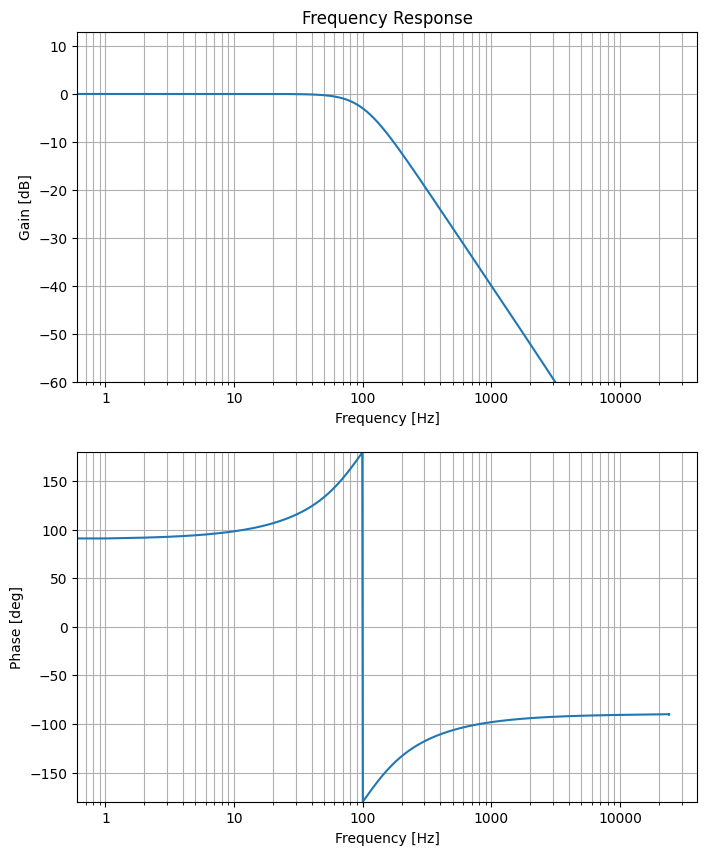

In [2]:
import CustomEq as Eq

fs = 48000

filter = Eq.Lowpass(Eq.FilterParameters.Q(0, 100, fs, 0.707))
filter.plotFreqResponse(True, True)

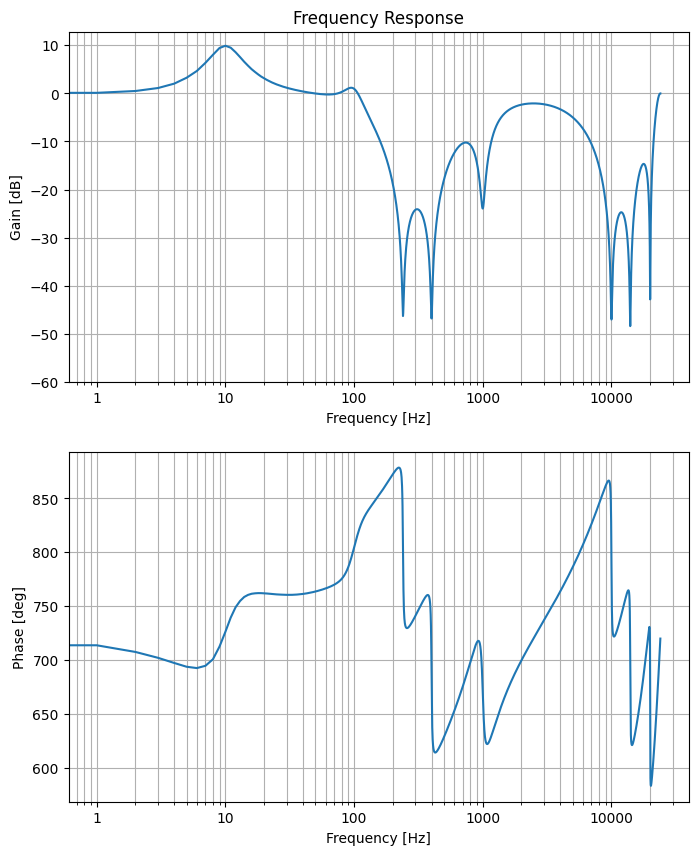

In [3]:
import CustomEq as Eq

fs = 48000
f1 = 10
f2 = 100
f3 = 1000
f4 = 10000
f5 = 14000
f6 = 20000
f7 = 240
f8 = 400

collection = Eq.FilterCollection([
    Eq.PeakingEQ(Eq.FilterParameters.Q(10, f1, fs, 1)), 
    Eq.PeakingEQ(Eq.FilterParameters.Q(5, f2, fs, 2)), 
    Eq.PeakingEQ(Eq.FilterParameters.Q(-20, f3, fs, 5)),
    Eq.PeakingEQ(Eq.FilterParameters.Q(-40, f4, fs, 5)),
    Eq.PeakingEQ(Eq.FilterParameters.Q(-40, f5, fs, 5)),
    Eq.PeakingEQ(Eq.FilterParameters.Q(-40, f6, fs, 5)),    
    Eq.PeakingEQ(Eq.FilterParameters.Q(-40, f7, fs, 5)),
    Eq.PeakingEQ(Eq.FilterParameters.Q(-40, f8, fs, 5))
])
collection.plotFreqResponse(True, True)

In [ ]:
import wave, struct
from math import floor
import matplotlib.pyplot as plt
import numpy as np
aud = wave.open("MetalPipe.wav", "r")

channels = aud.getparams().nchannels
sampwidth = aud.getparams().sampwidth
fs = aud.getparams().framerate

aud.getnframes
raw: bytes = aud.readframes(aud.getnframes())
pcm_left: np.ndarray[int] = np.zeros(shape=(floor(len(raw) / (channels))))
pcm_right: np.ndarray[int] = np.zeros(shape=(floor(len(raw) / (channels))))

for i in range(0, aud.getnframes()):
    #i_pcm = i * sampwidth
    i_left = i * sampwidth * channels
    i_right = i * sampwidth * channels + sampwidth
    wavedata_left = raw[i_left:i_left+sampwidth]
    pcm_left[i] = struct.unpack("<h", wavedata_left)[0]
    wavedata_right = raw[i_right:i_right+sampwidth]
    pcm_right[i] = struct.unpack("<h", wavedata_right)[0]

In [ ]:

raw_write = np.array([pcm_right, pcm_left]).T
raw_write= (raw_write * (2 ** 15 - 1)).astype("<h")

f = open("new.wav", "wb")
writer = wave.Wave_write(f)
writer.setframerate(fs)
writer.setnchannels(channels)
writer.setnframes(aud.getnframes())
writer.setsampwidth(sampwidth)
writer.setcomptype('NONE', 'not compressed')
writer.writeframesraw(raw_write.tobytes())

In [12]:
print(aud.getparams())

_wave_params(nchannels=2, sampwidth=2, framerate=48000, nframes=131518, comptype='NONE', compname='not compressed')


131518
263036


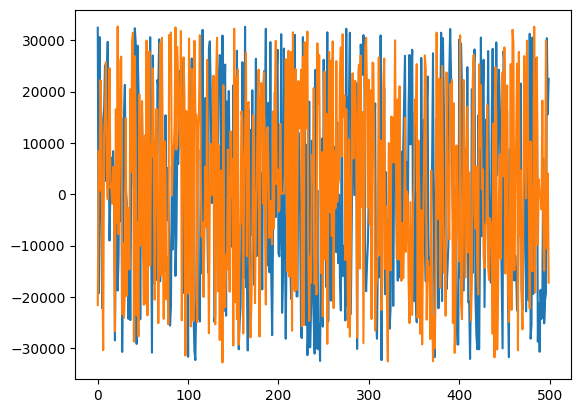

In [61]:
print(aud.getnframes())
print(len(pcm_left))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(pcm_left[25000:25500])
ax.plot(pcm_right[25000:25500])
